In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
#from wordcloud import WordCloud
import datetime as datetime

In [76]:
pwd

'/home/lindali/Dropbox/bot and agenda-setting/codes and data/github_despoit/bot_cascade_paper/analysis'

In [ ]:
import os
os.chdir("..")

In [77]:
%matplotlib inline
sns.set_style("whitegrid")

In [78]:
df5_bot = pd.read_csv("./data/for_cascade_vis/topic5_atypical_new.csv")
df7_bot = pd.read_csv("./data/for_cascade_vis/topic7_atypical.csv")

df7_user = pd.read_csv("./data/for_cascade_vis/bot_cascade_tweets_human.csv")
df5_user = pd.read_csv("./data/for_cascade_vis/mutual_cascade_tweets_human.csv")

In [79]:
#\tweet['counter'] = [1] * len(tweet['topic'])
#counts = tweet.groupby([pd.Grouper(freq = 'H'), 'topic'])['counter'].count()
#counts = counts.reset_index()

In [80]:
df7_bot['created_at_dt']=pd.to_datetime(df7_bot['created_at_dt'])
df5_bot['created_at_dt']=pd.to_datetime(df5_bot['created_at_dt'])

In [114]:
df7_user['created_at_dt']=pd.to_datetime(df7_user['created_at_dt'])
df5_user['created_at_dt']=pd.to_datetime(df5_user['created_at_dt'])

In [89]:
df5_bot = df5_bot.sort_values(by='created_at_dt')

In [60]:
#atypical_max=df7_bot.set_index("created_at_dt").tweet_num_atypical.max()
#typical_max=df7_bot.set_index("created_at_dt").tweet_num_typical.max()
#human_max=df7_bot.set_index("created_at_dt").tweet_num_human.max()

In [ ]:
#df7_bot["tweet_num_atypical_rel"]=df7_bot['tweet_num_atypical']/atypical_max
#df7_bot["tweet_num_typical_rel"]=df7_bot['tweet_num_typical']/typical_max
#df7_bot["tweet_num_human_rel"]=df7_bot['tweet_num_human']/human_max

In [11]:
#df7_bot.set_index("created_at_dt").tweet_num_atypical.rolling(6).mean().plot()
##df7_bot.set_index("created_at_dt").tweet_num_typical.rolling(6).mean().plot()
#df7_bot.set_index("created_at_dt").tweet_num_human.rolling(6).mean().plot()

In [12]:
#df7_bot.set_index("created_at_dt").tweet_num_atypical_rel.rolling(12).mean().plot()
#df7_bot.set_index("created_at_dt").tweet_num_typical_rel.rolling(12).mean().plot()
#df7_bot.set_index("created_at_dt").tweet_num_human_rel.rolling(12).mean().plot()

In [84]:
df5_user

,created_at_dt,id_x,diff_num
0,2019-11-29 17:00:00+00:00,1,NaN
1,2019-11-29 17:05:00+00:00,2,1.0
2,2019-11-29 17:10:00+00:00,0,-2.0
3,2019-11-29 17:15:00+00:00,1,1.0
4,2019-11-29 17:20:00+00:00,4,3.0
...,...,...,...
151,2019-11-30 05:35:00+00:00,9,7.0
152,2019-11-30 05:40:00+00:00,9,0.0
153,2019-11-30 05:45:00+00:00,6,-3.0
154,2019-11-30 05:50:00+00:00,12,6.0


In [115]:
bots_aggr=pd.DataFrame(df5_bot.set_index("created_at_dt").id_x.rolling(6).sum())
humans_aggr=pd.DataFrame(df5_user.set_index("created_at_dt").id_x.rolling(6).sum())

In [116]:
bots_aggr=bots_aggr.rename(columns={"id_x":"bots_num_tweets"})
humans_aggr=humans_aggr.rename(columns={"id_x":"humans_num_tweets"})

In [117]:
bots_aggr.head(10)

,bots_num_tweets
created_at_dt,
2019-11-29 17:05:00+00:00,NaN
2019-11-29 17:10:00+00:00,NaN
2019-11-29 17:15:00+00:00,NaN
2019-11-29 17:20:00+00:00,NaN
2019-11-29 17:25:00+00:00,NaN
2019-11-29 17:30:00+00:00,13.0
2019-11-29 17:35:00+00:00,12.0
2019-11-29 17:40:00+00:00,11.0
2019-11-29 17:45:00+00:00,13.0


In [99]:
humans_aggr.head(10)

,humans_num_tweets
created_at_dt,
2019-11-29 17:00:00+00:00,NaN
2019-11-29 17:05:00+00:00,NaN
2019-11-29 17:10:00+00:00,NaN
2019-11-29 17:15:00+00:00,NaN
2019-11-29 17:20:00+00:00,NaN
2019-11-29 17:25:00+00:00,8.0
2019-11-29 17:30:00+00:00,8.0
2019-11-29 17:35:00+00:00,7.0
2019-11-29 17:40:00+00:00,8.0


In [118]:
bots_humans=bots_aggr.merge(humans_aggr,left_index=True, right_index=True, how='outer')

In [119]:
bots_humans=bots_humans.dropna(subset=['bots_num_tweets','humans_num_tweets']).replace(np.nan,0)

In [120]:
bots_humans['bot_ratio']=bots_humans['bots_num_tweets']/(bots_humans['bots_num_tweets']+bots_humans['humans_num_tweets'])

In [121]:
bots_humans['Bots']=np.round(bots_humans['bot_ratio']*100,2)

In [122]:
bots_humans['Humans']=100-bots_humans['Bots']

In [123]:
bots_humans

,bots_num_tweets,humans_num_tweets,bot_ratio,Bots,Humans
created_at_dt,,,,,
2019-11-29 17:30:00+00:00,13.0,8.0,0.619048,61.90,38.10
2019-11-29 17:35:00+00:00,12.0,7.0,0.631579,63.16,36.84
2019-11-29 17:40:00+00:00,11.0,8.0,0.578947,57.89,42.11
2019-11-29 17:45:00+00:00,13.0,9.0,0.590909,59.09,40.91
2019-11-29 17:50:00+00:00,9.0,7.0,0.562500,56.25,43.75
...,...,...,...,...,...
2019-11-30 05:35:00+00:00,45.0,37.0,0.548780,54.88,45.12
2019-11-30 05:40:00+00:00,46.0,38.0,0.547619,54.76,45.24
2019-11-30 05:45:00+00:00,48.0,38.0,0.558140,55.81,44.19


NameError: name 'mpatches' is not defined

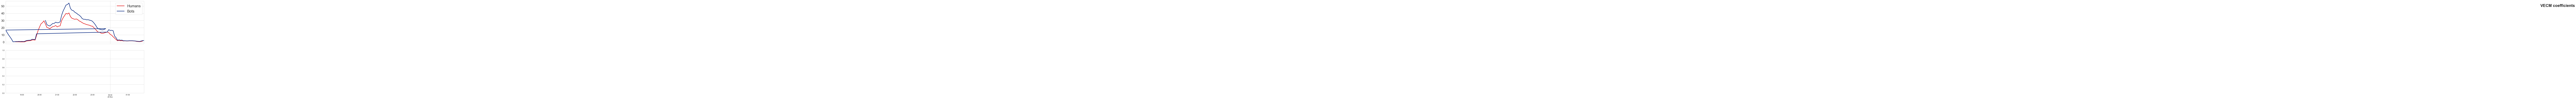

In [124]:
#fig, (ax1,ax2)=plt.subplots((1,2), figsize = (16,14))
fif, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize = (15,10), gridspec_kw = {'wspace':0.15, 
                                                                                    'hspace':0.15})


bot_color = "#0C2C84"
human_color = "#E31A1C"

#ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))
df7_user.set_index("created_at_dt").id_x.rolling(6).mean().plot(ax=ax1, color=human_color,
                                                               linewidth=3,
                                                              label='Humans')
df7_bot.set_index("created_at_dt").id_x.rolling(6).mean().plot(ax=ax1, color=bot_color,
                                                               linewidth=3,
                                                              label='Bots')

#ax1.plot(list(df7_user.created_at_dt), list(df7_user.id_x.rolling(6).mean()),color = human_color,
#        label = 'Number of tweets - human users', linewidth=3)
ax1.tick_params(axis='both', labelsize = 18)
ax1.tick_params(axis='x', labelrotation = 30)

ax1.legend(loc='upper right', fontsize=22)
#ax1.set_title("Bot-generated cascade: Political campaigns", size = 22)
#ax1.text(bots_humans.index[1],45,"Bot --> Human: F = 6.06***\nHuman --> Bot: F = 1.50", size=24)

#fig, axs = plt.subplots(nrows=2)
ax1.text(bots_humans.index[1],49,"VECM coefficients",fontsize=24, weight='bold')


#Bot to human F=2.77**
#Human to bot F=2.54**
arrow = mpatches.FancyArrowPatch((bots_humans.index[16], 40), 
                                 (bots_humans.index[30], 40), 
                                 mutation_scale=25, color=bot_color)
ax1.annotate("3.37**", (.56, .8), xycoords=arrow, ha='center', va='bottom', fontsize=20)
ax1.text(bots_humans.index[7],40,"Bots",fontsize=24,color=bot_color)
ax1.text(bots_humans.index[31],40,"Humans",fontsize=24,color=human_color)
ax1.add_patch(arrow)


arrow2 = mpatches.FancyArrowPatch((bots_humans.index[16], 32), 
                                 (bots_humans.index[30], 32), 
                                 mutation_scale=25, color=human_color)
ax1.annotate("-0.37***", (.56, .8), xycoords=arrow2, ha='center', va='bottom', fontsize=20)
ax1.text(bots_humans.index[0],32,"Humans",fontsize=24,color=human_color)
ax1.text(bots_humans.index[31],32,"Bots",fontsize=24,color=bot_color)
ax1.add_patch(arrow2)

#arrow = mpatches.FancyArrowPatch((x_tail, y_tail), (x_head, y_head),
#                                 mutation_scale=100)
#axs[1].add_patch(arrow)
#axs[1].set(xlim=(0, 2), ylim=(0, 2))


ax1.set_xticklabels(["","", ""], rotation=0, size = 18)
#ax1.set_xticklabels = [item.strftime('%h %b %d') for item in df7_bot.set_index("created_at_dt").id_x.rolling(6).mean().index]

ax1.set_xlabel("Time (hours EST, Nov. 30., 2019)", size = 24)

ax1.yaxis.set_label_coords(-0.05,1.02)
ax2.yaxis.set_label_coords(-0.05,1.02)

ax1.set_ylabel("Number of tweets", size = 26)
ax2.set_ylabel("Percentage of tweets", size = 26)


# ax2
bots_humans[["Bots",'Humans']].plot.area(ax=ax2,color=[bot_color,human_color])
ax2.tick_params(axis='both', labelsize = 22)
ax1.tick_params(axis='both', labelsize = 22)

#first = list(df7_total.bot_pct.rolling(12).mean())[25]*100
first=np.round(bots_humans['Bots'][:1],0)[0]
first_val = str(round(int(np.round(bots_humans['Bots'][:1],0)[0]),2)) +"%"#last = list(df7_total.bot_pct.rolling(12).mean())[-10]*100
last=np.round(bots_humans['Bots'][-1:],0)[0]
last_val = str(round(int(np.round(bots_humans['Bots'][-1:],0)[0]),2)) +"%"
ax2.text(bots_humans.index[1], first-18, first_val, size=25, color = "#ffffff")
ax2.text(bots_humans.index[-10], last-18, last_val, size=25, color = "#ffffff")

ax2.set_xticklabels(["","00:00", ""], rotation=0, size = 24)
ax2.legend(fontsize=22)
ax2.set_xlabel("Time (hours EST, Nov. 30., 2019)", size = 24, weight='bold')
ax1.set_xlabel("Time (hours EST, Nov. 30., 2019)", size = 24, weight='bold')

arrow2 = mpatches.FancyArrowPatch((bots_humans.index[4], first-10), 
                                 (bots_humans.index[0], first), 
                                 mutation_scale=21, color="white")
ax2.add_patch(arrow2)

arrow3 = mpatches.FancyArrowPatch((bots_humans.index[-6], last-10), 
                                 (bots_humans.index[-1], last), 
                                 mutation_scale=21, color="white")
ax2.add_patch(arrow3)

handles, labels = ax2.get_legend_handles_labels()

#specify order of items in legend
order = [1,0]

#add legend to plot
ax2.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc='upper right', fontsize=22) 

#ax1.annotate("F = 2.77**", (.56, .8), xycoords=arrow, ha='center', va='bottom', fontsize=18)
#ax1.text(bots_humans.index[7],45,"Bots",fontsize=22,color=bot_color)
#ax1.text(bots_humans.index[30],45,"Humans",fontsize=22,color=human_color)


#ax1.annotate("", xy=(0.5, 0.5), xytext=(0, 0),
#            arrowprops=dict(arrowstyle="->"))
ax2.grid(False)
ax2.set_ylim(0,100)
ax1.set_title("A", weight='bold', fontsize=28, position=(0.02, 1.),
                     horizontalalignment='left', verticalalignment='bottom')
ax2.set_title("B", weight='bold', fontsize=28, position=(0.02, 1.),
                     horizontalalignment='left', verticalalignment='bottom')
ax2.tick_params(axis='both', which='minor', labelsize=22)
ax1.tick_params(axis='both', which='minor', labelsize=22)
ax2.tick_params(axis='both', which='major', labelsize=24)
ax1.tick_params(axis='both', which='major', labelsize=24)

#plt.savefig("/Users/vorsi/Dropbox/bot and agenda-setting/orsi/data_for_figs/Figure2.pdf", bbox_inches='tight')
#plt.savefig("/Users/vorsi/Dropbox/bot and agenda-setting/orsi/data_for_figs/Figure2.png", bbox_inches='tight')



In [125]:
import matplotlib.dates as mdates
import matplotlib.patches as mpatches

In [130]:
bots_humans

,bots_num_tweets,humans_num_tweets,bot_ratio,Bots,Humans
created_at_dt,,,,,
2019-11-29 17:30:00+00:00,13.0,8.0,0.619048,61.90,38.10
2019-11-29 17:35:00+00:00,12.0,7.0,0.631579,63.16,36.84
2019-11-29 17:40:00+00:00,11.0,8.0,0.578947,57.89,42.11
2019-11-29 17:45:00+00:00,13.0,9.0,0.590909,59.09,40.91
2019-11-29 17:50:00+00:00,9.0,7.0,0.562500,56.25,43.75
...,...,...,...,...,...
2019-11-30 05:35:00+00:00,45.0,37.0,0.548780,54.88,45.12
2019-11-30 05:40:00+00:00,46.0,38.0,0.547619,54.76,45.24
2019-11-30 05:45:00+00:00,48.0,38.0,0.558140,55.81,44.19


/tmp/ipykernel_22271/1223107740.py:55: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(["","", ""], rotation=0, size = 18)
/tmp/ipykernel_22271/1223107740.py:80: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(["","00:00", ""], rotation=0, size = 24)


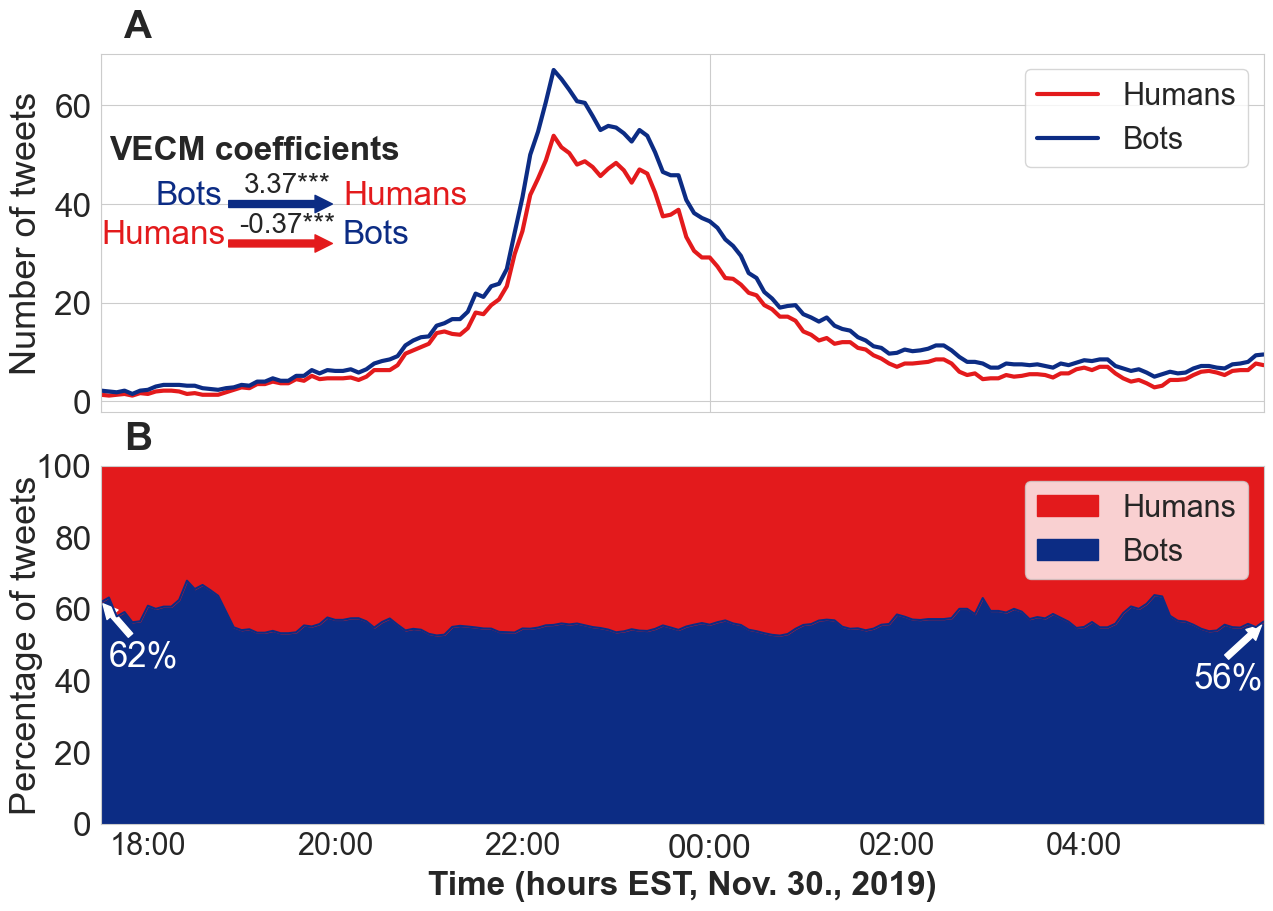

In [132]:
#fig, (ax1,ax2)=plt.subplots((1,2), figsize = (16,14))
fif, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize = (15,10), gridspec_kw = {'wspace':0.15, 
                                                                                    'hspace':0.15})


bot_color = "#0C2C84"
human_color = "#E31A1C"

#ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))
df5_user.set_index("created_at_dt").id_x.rolling(6).mean().plot(ax=ax1, color=human_color,
                                                               linewidth=3,
                                                              label='Humans')
df5_bot.set_index("created_at_dt").id_x.rolling(6).mean().plot(ax=ax1, color=bot_color,
                                                               linewidth=3,
                                                              label='Bots')

#ax1.plot(list(df5_user.created_at_dt), list(df5_user.id_x.rolling(6).mean()),color = human_color,
#        label = 'Number of tweets - human users', linewidth=3)
ax1.tick_params(axis='both', labelsize = 18)
ax1.tick_params(axis='x', labelrotation = 30)

ax1.legend(loc='upper right', fontsize=22)
#ax1.set_title("Bot-generated cascade: Political campaigns", size = 22)
#ax1.text(bots_humans.index[1],45,"Bot --> Human: F = 6.06***\nHuman --> Bot: F = 1.50", size=24)

#fig, axs = plt.subplots(nrows=2)#
ax1.text(bots_humans.index[1],49,"VECM coefficients",fontsize=24, weight='bold')


#Bot to human F=2.77**
#Human to bot F=2.54**
arrow = mpatches.FancyArrowPatch((bots_humans.index[16], 40), 
                                 (bots_humans.index[30], 40), 
                                 mutation_scale=25, color=bot_color)
ax1.annotate("3.37***", (.56, .8), xycoords=arrow, ha='center', va='bottom', fontsize=20)
ax1.text(bots_humans.index[7],40,"Bots",fontsize=24,color=bot_color)
ax1.text(bots_humans.index[31],40,"Humans",fontsize=24,color=human_color)
ax1.add_patch(arrow)


arrow2 = mpatches.FancyArrowPatch((bots_humans.index[16], 32), 
                                 (bots_humans.index[30], 32), 
                                 mutation_scale=25, color=human_color)
ax1.annotate("-0.37***", (.56, .8), xycoords=arrow2, ha='center', va='bottom', fontsize=20)
ax1.text(bots_humans.index[0],32,"Humans",fontsize=24,color=human_color)
ax1.text(bots_humans.index[31],32,"Bots",fontsize=24,color=bot_color)
ax1.add_patch(arrow2)

#arrow = mpatches.FancyArrowPatch((x_tail, y_tail), (x_head, y_head),
#                                 mutation_scale=100)
#axs[1].add_patch(arrow)
#axs[1].set(xlim=(0, 2), ylim=(0, 2))


ax1.set_xticklabels(["","", ""], rotation=0, size = 18)
#ax1.set_xticklabels = [item.strftime('%h %b %d') for item in df7_bot.set_index("created_at_dt").id_x.rolling(6).mean().index]

ax1.set_xlabel("Time (hours EST, Nov. 30., 2019)", size = 24)

ax1.yaxis.set_label_coords(-0.05,1.02)
ax2.yaxis.set_label_coords(-0.05,1.02)

ax1.set_ylabel("Number of tweets", size = 26)
ax2.set_ylabel("Percentage of tweets", size = 26)


# ax2
bots_humans[["Bots",'Humans']].plot.area(ax=ax2,color=[bot_color,human_color])
ax2.tick_params(axis='both', labelsize = 22)
ax1.tick_params(axis='both', labelsize = 22)

#first = list(df7_total.bot_pct.rolling(12).mean())[25]*100
first=np.round(bots_humans['Bots'][:1],0)[0]
first_val = str(round(int(np.round(bots_humans['Bots'][:1],0)[0]),2)) +"%"#last = list(df7_total.bot_pct.rolling(12).mean())[-10]*100
last=np.round(bots_humans['Bots'][-1:],0)[0]
last_val = str(round(int(np.round(bots_humans['Bots'][-1:],0)[0]),2)) +"%"
ax2.text(bots_humans.index[1], first-18, first_val, size=25, color = "#ffffff")
ax2.text(bots_humans.index[-10], last-18, last_val, size=25, color = "#ffffff")

ax2.set_xticklabels(["","00:00", ""], rotation=0, size = 24)
ax2.legend(fontsize=22)
ax2.set_xlabel("Time (hours EST, Nov. 30., 2019)", size = 24, weight='bold')
ax1.set_xlabel("Time (hours EST, Nov. 30., 2019)", size = 24, weight='bold')

arrow2 = mpatches.FancyArrowPatch((bots_humans.index[4], first-10), 
                                 (bots_humans.index[0], first), 
                                 mutation_scale=21, color="white")
ax2.add_patch(arrow2)

arrow3 = mpatches.FancyArrowPatch((bots_humans.index[-6], last-10), 
                                 (bots_humans.index[-1], last), 
                                 mutation_scale=21, color="white")
ax2.add_patch(arrow3)

handles, labels = ax2.get_legend_handles_labels()

#specify order of items in legend
order = [1,0]

#add legend to plot
ax2.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc='upper right', fontsize=22) 

#ax1.annotate("F = 2.77**", (.56, .8), xycoords=arrow, ha='center', va='bottom', fontsize=18)
#ax1.text(bots_humans.index[7],45,"Bots",fontsize=22,color=bot_color)
#ax1.text(bots_humans.index[30],45,"Humans",fontsize=22,color=human_color)


#ax1.annotate("", xy=(0.5, 0.5), xytext=(0, 0),
#            arrowprops=dict(arrowstyle="->"))
ax2.grid(False)
ax2.set_ylim(0,100)
ax1.set_title("A", weight='bold', fontsize=28, position=(0.02, 1.),
                     horizontalalignment='left', verticalalignment='bottom')
ax2.set_title("B", weight='bold', fontsize=28, position=(0.02, 1.),
                     horizontalalignment='left', verticalalignment='bottom')
ax2.tick_params(axis='both', which='minor', labelsize=22)
ax1.tick_params(axis='both', which='minor', labelsize=22)
ax2.tick_params(axis='both', which='major', labelsize=24)
ax1.tick_params(axis='both', which='major', labelsize=24)

#plt.savefig("/Users/vorsi/Dropbox/bot and agenda-setting/orsi/data_for_figs/Figure2.pdf", bbox_inches='tight')
#plt.savefig("/Users/vorsi/Dropbox/bot and agenda-setting/orsi/data_for_figs/Figure2.png", bbox_inches='tight')

plt.savefig("./Figure2_new.pdf", bbox_inches='tight')
plt.savefig("./Figure2_new.png", bbox_inches='tight')

# VISUALIZE PREDICTIONS

In [ ]:
i

# read daily bot data in

In [229]:
df=pd.read_csv("/Users/vorsi/Dropbox/bot and agenda-setting/codes and data/bot_days_data20231129.csv")

In [238]:
df2=pd.read_csv('/Users/vorsi/Dropbox/bot and agenda-setting/codes and data/github_despoit/data/df_for_reg/BOTOMETER_table_for_reg_with_ctrls_matched_uid_0.5.csv')

In [264]:
#df2[["author_id_",'bot_interaction','after_timegap_','log_daily_tweet','senti_size','senti_mean']]

In [388]:
#df.columns

In [389]:
matched_pairs=pd.read_csv("/Users/vorsi/Dropbox/bot and agenda-setting/codes and data/github_despoit/data/df_for_reg/BOTOMETER_based_user_and_matched_bot_prob_0.5.csv")

In [391]:
matched_pairs[matched_pairs['uid']==2301078271]

,uid,matched_uid,id,is_bot_rf20_prob,is_bot_rf20,is_bot_dl_rough,is_bot_dl_prob,is_bot_xgb,is_bot_xgb_prob,is_bot_botometer_prob,...,is_bot_xgb_matched,is_bot_xgb_prob_matched,is_bot_botometer_prob_matched,astroturf_display_english_matched,fake_follower_display_english_matched,financial_display_english_matched,other_display_english_matched,overall_display_english_matched,self_declared_display_english_matched,spammer_display_english_matched
230,2301078271,755219085122613248,2301078271,0.489999,0.0,1,0.598385,0,0.2352,0.226318,...,0,0.195950,0.000000,1.5,0.5,0.0,0.4,0.0,0.0,0.0
231,2301078271,28963985,2301078271,0.489999,0.0,1,0.598385,0,0.2352,0.226318,...,0,0.012724,0.278726,0.6,0.4,0.1,0.4,0.2,0.0,0.1


In [ ]:
23468714

In [393]:
bot_exposed=list(matched_pairs['uid'])
matched=list(matched_pairs['matched_uid'])

In [394]:
rel_pairs=[]
for bot_e, mat in zip(bot_exposed,matched):
    if bot_e in list(df2['author_id_']) and mat in list(df2['author_id_']):
        rel_pairs.append((bot_e,mat))

In [395]:
df['daily_tweet_count']=10**df['log_daily_tweet']-1

In [300]:
#bot_exposed+

In [396]:
from collections import defaultdict
all_authors=[]
for author in bot_exposed:
    print(author)
    adays=[]
    a=df2[(df2['author_id_']==author) &
          (df2["bot_interaction"]==1)].sort_values(by="after_timegap_")
    for day in range(-30,31):
        #print(day)
        rel_row=a[a['after_timegap_']==day][["log_daily_tweet", 'senti_size','senti_mean']]
        if len(rel_row)==0:
            rel_row=pd.DataFrame(0, index=[0], columns=["log_daily_tweet", 'senti_size','senti_mean'])
        rel_row['after_timegap_']=day
        rel_row['author_id']=author
        adays.append(rel_row)
    A=pd.concat(adays)   
    all_authors.append(A)

12615
2059811
2119871
2119871
9039652
9039652
9039652
12727722
13139632
13222472
13746352
13746352
14347286
14562053
14743768
15055612
15220152
16876354
17515377
17900911
17976040
17976040
18935688
19031426
19124963
19326808
19668860
19668860
19690643
20662651
20662651
20751456
20786656
21580078
21580078
21652548
21927175
22707024
23670575
26897096
29571189
29581101
29581101
30501371
30501371
31110135
31721214
32939468
35861608
36161030
37449615
37696718
37976637
38413353
42345524
44334648
53908289
62196095
62839691
66349441
68384455
69910539
74816700
78820866
80919423
80919423
84043985
88454719
91564001
93901628
102086464
102086464
105575594
120864377
127040659
131625726
134809594
142762311
150289183
151552315
152832615
168574372
168574372
170078850
171536226
184456797
198661271
198661271
198727833
203840744
205631909
205631909
208300183
209742395
218542182
222226603
222978177
224390543
224390543
229811940
239595695
239936209
240201514
243025229
262893407
263191663
267292464
267658022

In [292]:
bot_exposed_key_variables=pd.concat(all_authors)

In [298]:
#matched

In [301]:
all_authors=[]
for author in matched:
    print(author)
    adays=[]
    a=df2[(df2['author_id_']==author) &
          (df2["bot_interaction"]==0)].sort_values(by="after_timegap_")
    for day in range(-30,31):
        #print(day)
        rel_row=a[a['after_timegap_']==day][["log_daily_tweet", 'senti_size','senti_mean']]
        if len(rel_row)==0:
            rel_row=pd.DataFrame(0, index=[0], columns=["log_daily_tweet", 'senti_size','senti_mean'])
        rel_row['after_timegap_']=day
        rel_row['author_id']=author
        adays.append(rel_row)
    A=pd.concat(adays)   
    all_authors.append(A)
matched_key_variables=pd.concat(all_authors)

1445495942
25235151
821113772634992640
365191066
20875434
563659652
3222769754
309710016
1048605306312224768
1763261
27444759
87777378
1319949595
118827400
21449974
99369654
374390002
18594598
124748681
227455180
1634248890
50684256
955873327
1179710990
71048726
350341283
1062808363908485120
25709850
283419258
142109657
47975262
3047538243
32629751
19725929
162657722
18838256
15945574
195989179
41394240
733160606111567872
55993
958461125229727744
917266250216157184
15021381
121214899
1621562390
257870048
2780593850
998873369666904064
23377569
831906828393074688
15567322
433060763
11121802
253137957
33864752
504406801
21722675
365560021
213067698
260962472
178947924
110437588
304996763
1198980889
4761875576
273841490
2382106993
1611887712
133384283
2933827809
1066901215261409280
7825642
127908385
251146672
3262707432
456636692
1109624039046184960
18006684
25060640
20906323
3166960836
142762311
57516697
1087838420
202825388
1650207924
885549279909220352
14103260
22133083
96353879
5879472

In [397]:
matched_key_variables['daily_tweet_count']=10**matched_key_variables['log_daily_tweet']
bot_exposed_key_variables['daily_tweet_count']=10**bot_exposed_key_variables['log_daily_tweet']

In [398]:
matched_key_variables=matched_key_variables.astype('float64')
bot_exposed_key_variables=bot_exposed_key_variables.astype('float64')

In [399]:
bot_exposed_key_variables[bot_exposed_key_variables['author_id']==2301078271]

,log_daily_tweet,senti_size,senti_mean,after_timegap_,author_id,daily_tweet_count
0,0.000000,0.0,0.000000,-30.0,2.301078e+09,1.000000
0,0.000000,0.0,0.000000,-29.0,2.301078e+09,1.000000
0,0.000000,0.0,0.000000,-28.0,2.301078e+09,1.000000
0,0.000000,0.0,0.000000,-27.0,2.301078e+09,1.000000
2276,1.791759,6.0,0.051267,-26.0,2.301078e+09,61.909810
...,...,...,...,...,...,...
2363,3.091042,22.0,-0.498645,28.0,2.301078e+09,1233.225378
2364,3.091042,22.0,-0.262791,29.0,2.301078e+09,1233.225378
2365,3.091042,22.0,-0.262791,29.0,2.301078e+09,1233.225378
2366,0.693147,2.0,-0.133500,30.0,2.301078e+09,4.933410


In [400]:
matched_key_variables[matched_key_variables['author_id']==23468714]

,log_daily_tweet,senti_size,senti_mean,after_timegap_,author_id,daily_tweet_count
0,0.000000,0.0,0.00000,-30.0,23468714.0,1.00000
0,0.000000,0.0,0.00000,-29.0,23468714.0,1.00000
4322,0.000000,1.0,0.75790,-28.0,23468714.0,1.00000
4323,0.000000,1.0,0.00000,-27.0,23468714.0,1.00000
4324,0.693147,2.0,0.00000,-26.0,23468714.0,4.93341
...,...,...,...,...,...,...
4367,0.000000,1.0,0.14810,26.0,23468714.0,1.00000
0,0.000000,0.0,0.00000,27.0,23468714.0,1.00000
4368,1.791759,6.0,-0.08235,28.0,23468714.0,61.90981
4369,0.000000,1.0,0.87770,29.0,23468714.0,1.00000


In [404]:
from pydtw import dtw1d

False

<ipython-input-410-f45f64711f90>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(range(-30,0))
<ipython-input-410-f45f64711f90>:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(range(-30,0))
<ipython-input-410-f45f64711f90>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(range(-30,0))
<ipython-input-410-f45f64711f90>:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(range(-30,0))
<ipython-input-410-f45f64711f90>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(range(-30,0))
<ipython-input-410-f45f64711f90>:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(range(-30,0))
<ipython-input-410-f45f64711f90>:40: UserWarning: FixedFormatter should only be used together with FixedLocator


<ipython-input-410-f45f64711f90>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(range(-30,0))
<ipython-input-410-f45f64711f90>:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(range(-30,0))
<ipython-input-410-f45f64711f90>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(range(-30,0))
<ipython-input-410-f45f64711f90>:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(range(-30,0))
<ipython-input-410-f45f64711f90>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(range(-30,0))
<ipython-input-410-f45f64711f90>:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(range(-30,0))
<ipython-input-410-f45f64711f90>:40: UserWarning: FixedFormatter should only be used together with FixedLocator


<ipython-input-410-f45f64711f90>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(range(-30,0))
<ipython-input-410-f45f64711f90>:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(range(-30,0))
<ipython-input-410-f45f64711f90>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(range(-30,0))
<ipython-input-410-f45f64711f90>:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(range(-30,0))
<ipython-input-410-f45f64711f90>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(range(-30,0))
<ipython-input-410-f45f64711f90>:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(range(-30,0))
<ipython-input-410-f45f64711f90>:40: UserWarning: FixedFormatter should only be used together with FixedLocator


<ipython-input-410-f45f64711f90>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(range(-30,0))
<ipython-input-410-f45f64711f90>:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(range(-30,0))
<ipython-input-410-f45f64711f90>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(range(-30,0))
<ipython-input-410-f45f64711f90>:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(range(-30,0))
<ipython-input-410-f45f64711f90>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(range(-30,0))
<ipython-input-410-f45f64711f90>:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(range(-30,0))
<ipython-input-410-f45f64711f90>:40: UserWarning: FixedFormatter should only be used together with FixedLocator


<ipython-input-410-f45f64711f90>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(range(-30,0))
<ipython-input-410-f45f64711f90>:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(range(-30,0))
<ipython-input-410-f45f64711f90>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(range(-30,0))
<ipython-input-410-f45f64711f90>:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(range(-30,0))
<ipython-input-410-f45f64711f90>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(range(-30,0))
<ipython-input-410-f45f64711f90>:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(range(-30,0))
<ipython-input-410-f45f64711f90>:40: UserWarning: FixedFormatter should only be used together with FixedLocator


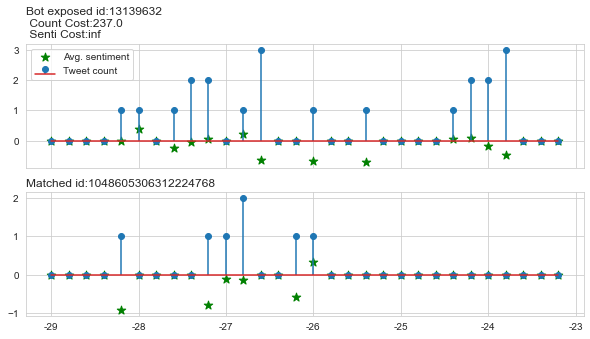

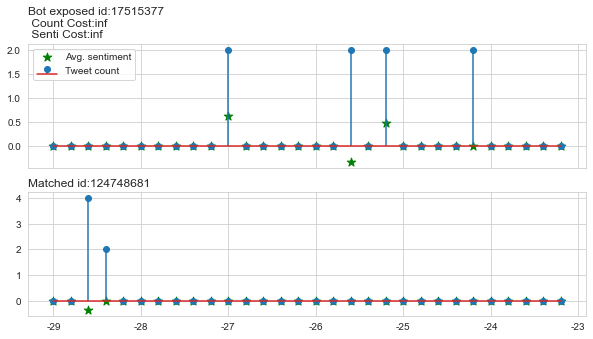

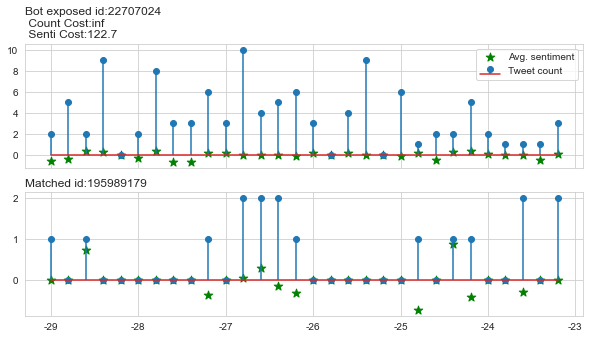

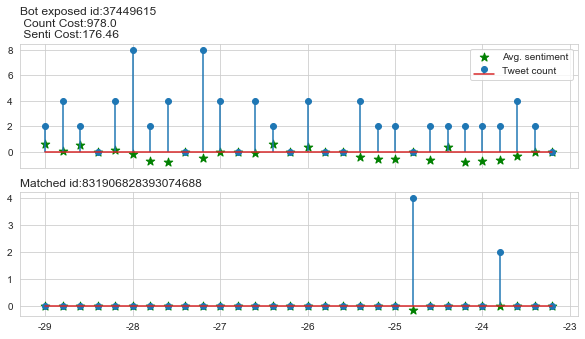

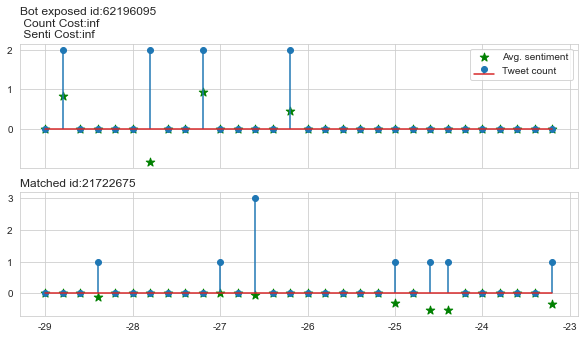

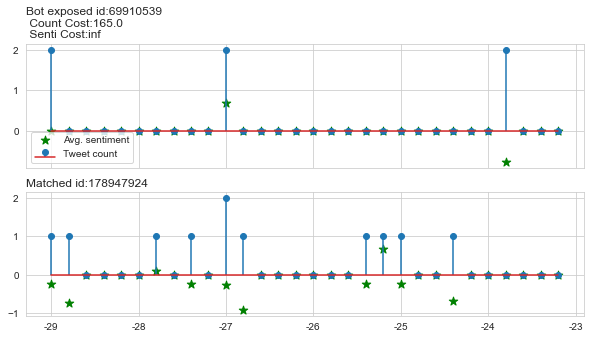

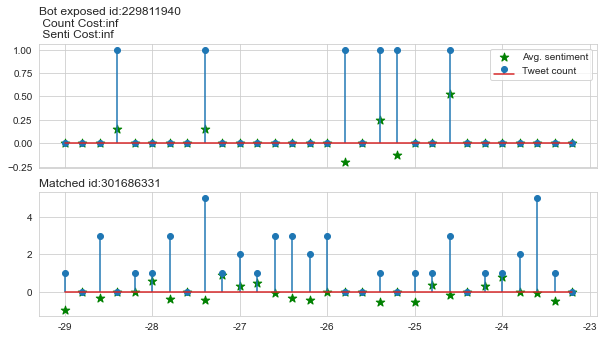

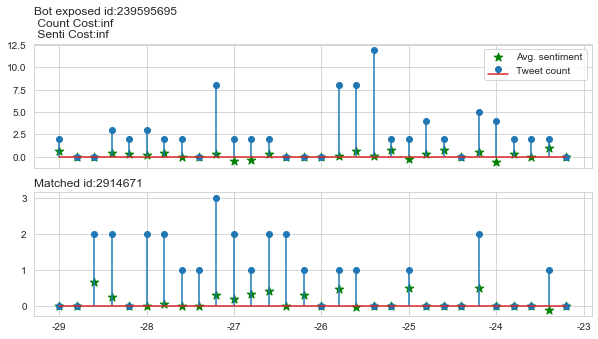

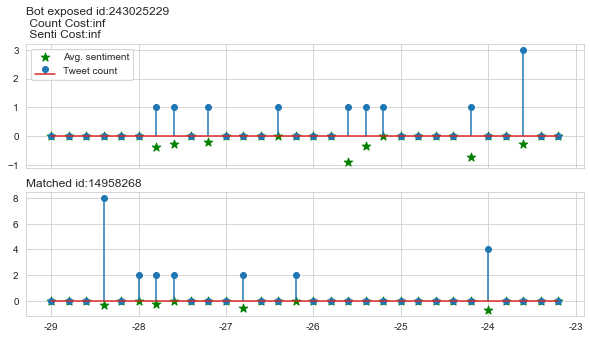

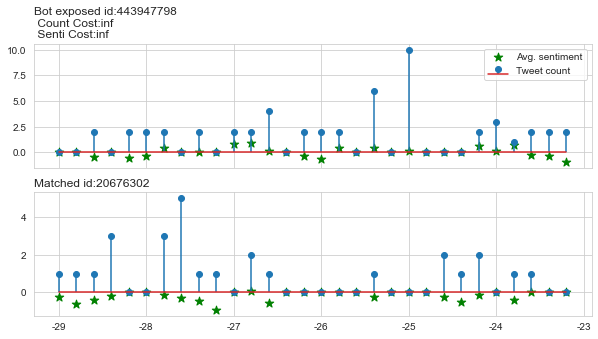

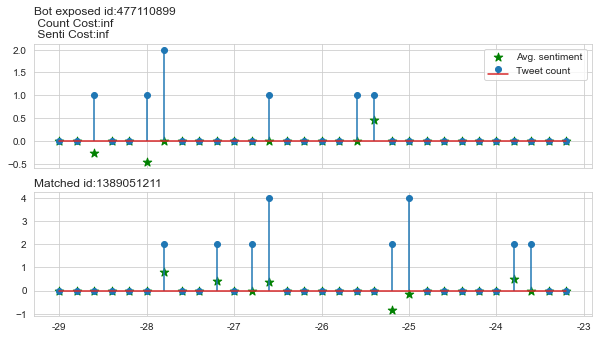

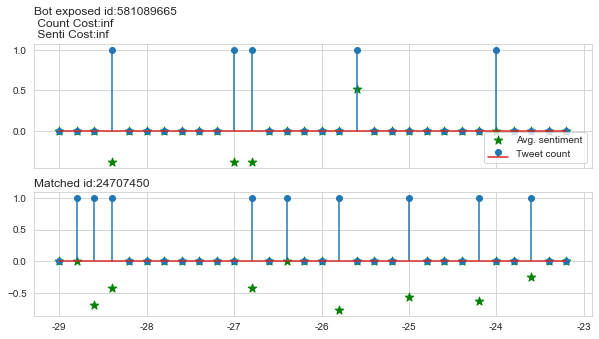

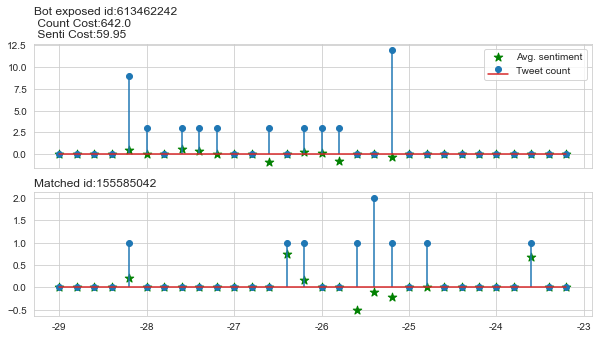

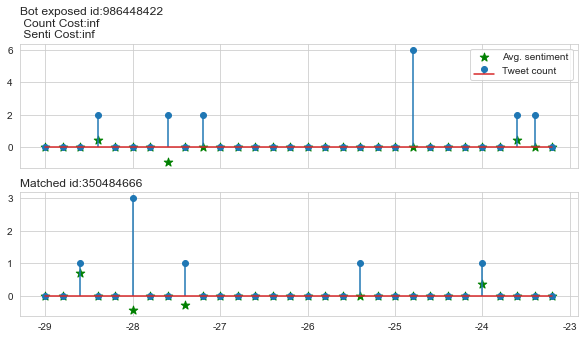

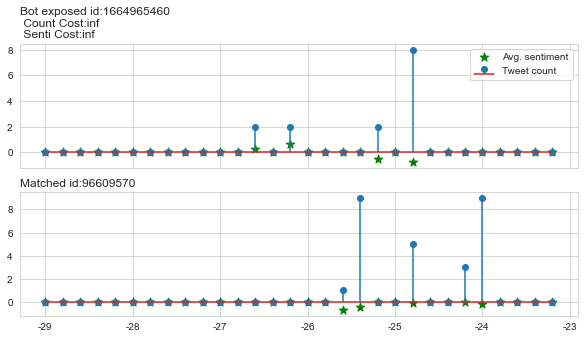

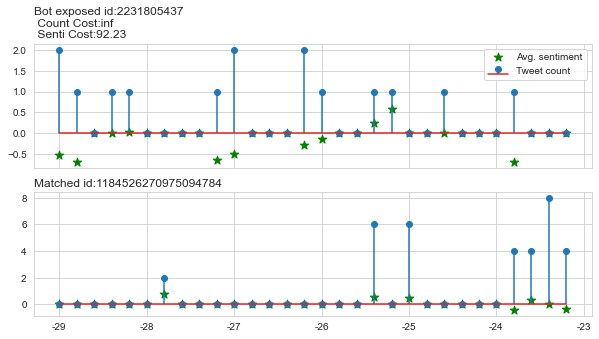

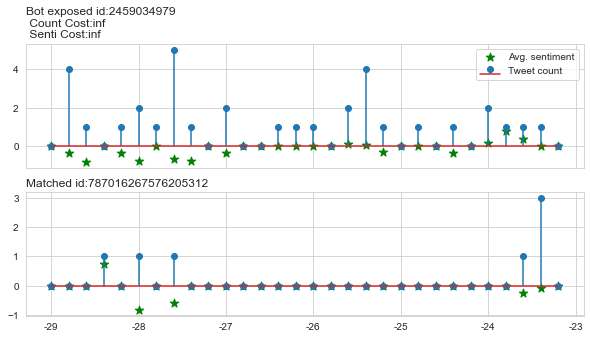

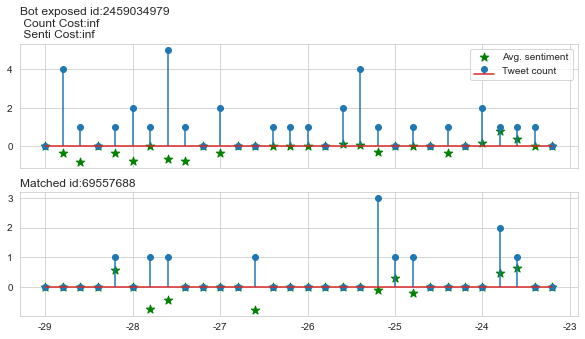

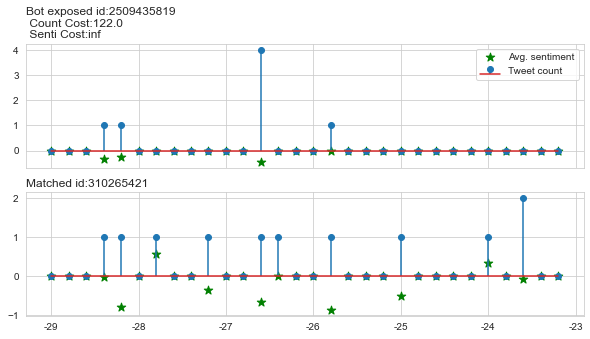

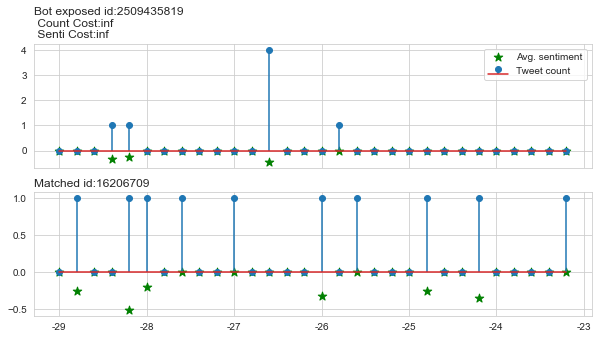

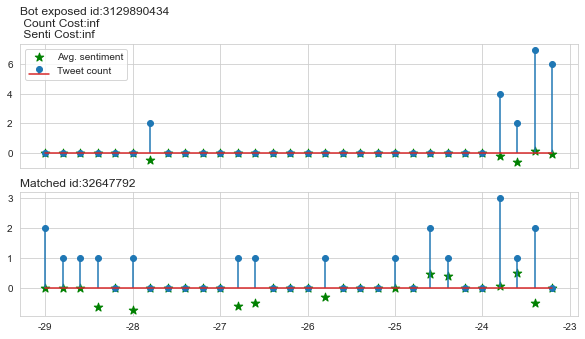

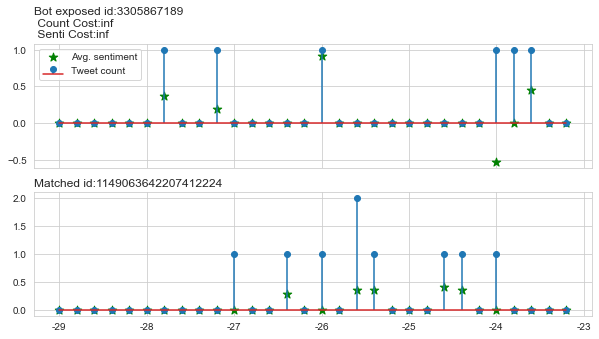

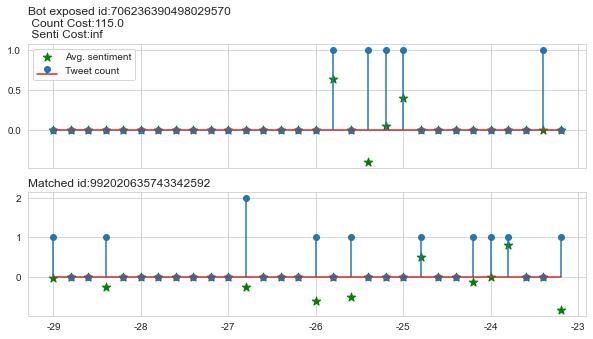

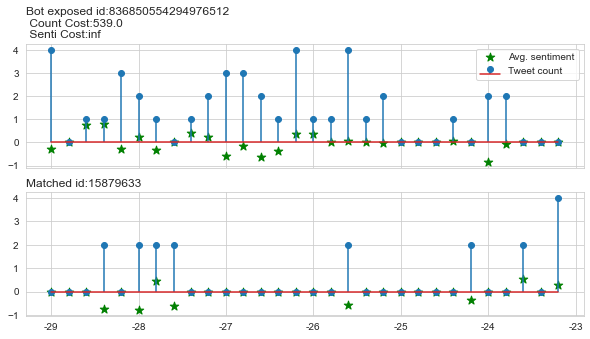

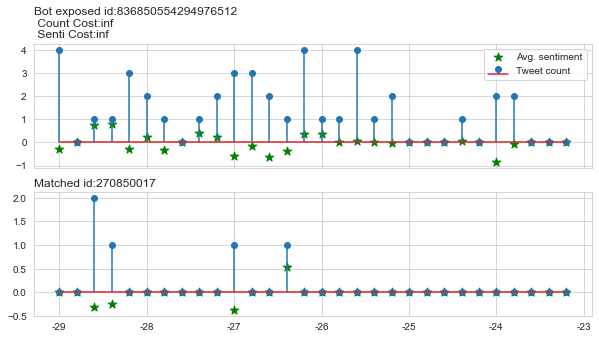

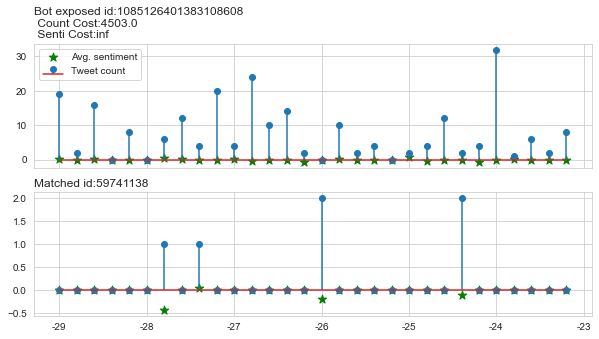

In [410]:
rel_pairs_smaller=[]
for bot_exp, matched in rel_pairs:
    
    bot_exp_timeline=bot_exposed_key_variables[(bot_exposed_key_variables['author_id']==bot_exp) &
   (bot_exposed_key_variables['after_timegap_']<0)].drop_duplicates()
    
    matched_timeline=matched_key_variables[(matched_key_variables['author_id']==matched) &
   (matched_key_variables['after_timegap_']<0)]
    
    if len(bot_exp_timeline)!=len(matched_timeline):
        break
    
    
    if bot_exp_timeline['senti_size'].sum()>=5 \
    and matched_timeline['senti_size'].sum()>=5:
        a=np.array(matched_timeline.set_index('after_timegap_')['senti_size'])
        b=np.array(bot_exp_timeline.set_index('after_timegap_')['senti_size'])
        cost_matrix, cost, alignmend_a, alignmend_b = dtw1d(a, b)
        
        a1=np.array(matched_timeline.set_index('after_timegap_')['senti_mean'])
        b1=np.array(bot_exp_timeline.set_index('after_timegap_')['senti_mean'])
        cost_matrix1, cost1, alignmend_a1, alignmend_b1 = dtw1d(a1, b1)
        
        rel_pairs_smaller.append((bot_exp, matched, cost,cost1))
        #print(bot_exp, matched)
        
        #print(cost)
        fig, (ax1,ax2)=plt.subplots(2,1, figsize=(10,5), sharex=True, sharey=False)
        
        
        ax2.stem(list(matched_timeline.set_index('after_timegap_')['senti_size']))
        ax2.set_title("Matched id:"+str(matched), loc='left')
        ax1.stem(list(bot_exp_timeline.set_index('after_timegap_')['senti_size']),label='Tweet count')
        #ax1.annotate(xy=(2,max(a)-.5), s=str(bot_exp)+", "+str(matched))
        ax1.scatter(range(0,30),bot_exp_timeline['senti_mean'], marker="*", color="green", s=80, label='Avg. sentiment')
        
        ax2.scatter(range(0,30),matched_timeline['senti_mean'], marker="*", s=80, color="green")
        ax1.set_title("Bot exposed id:"+str(bot_exp)+"\n Count Cost:"+str(np.round(cost,2))+"\n Senti Cost:"+str(np.round(cost1,2)), loc='left')
        ax1.legend()
        ax2.set_xticklabels(range(-30,0))
        ax1.set_xticklabels(range(-30,0))
        print("\n")
        print("\n")